<a href="https://colab.research.google.com/github/matthewmyrick/DataAnalyticsPortfolio/blob/main/Covid19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import statements
import requests
import json
import statistics
from datetime import date

# import data libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# import data visualizations libraries
import matplotlib.pyplot as plt
# changes


In [ ]:
# static vairables
BASE_URL = "https://api.covidtracking.com/"
HISTORIC_US_URL = BASE_URL+"{}".format("v2/us/daily.json")
CURRENT_US_URL = BASE_URL+"{}".format("v1/us/current.json")
def HISTORIC_STATE_URL(state):
  return BASE_URL + "{}".format("v1/states/ca/daily.json")
STATES = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

---
## **This Section focuses on the Current state of COVID-19 disease in the United States.**
---

In [ ]:
# current state of COVID 19 in the United States request
response = requests.get(CURRENT_US_URL)
response.status_code
data = response.json()[0]
# print(json.dumps(data, indent=4, sort_keys=True))

In [ ]:
print("Today: {}".format(date.today()))
print("Death Increase: {}".format(data['deathIncrease']))
print("Hospitalized Increase: {}".format(data['hospitalizedIncrease']))
print("Positive Increase: {}".format(data['positiveIncrease']))
print("Negative Increase: {}".format(data['negativeIncrease']))
print("Test Result Increase: {}".format(data['totalTestResultsIncrease']))

Today: 2021-09-29
Death Increase: 842
Hospitalized Increase: 726
Positive Increase: 41835
Negative Increase: 131835
Test Result Increase: 1170059


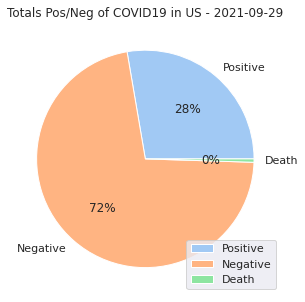

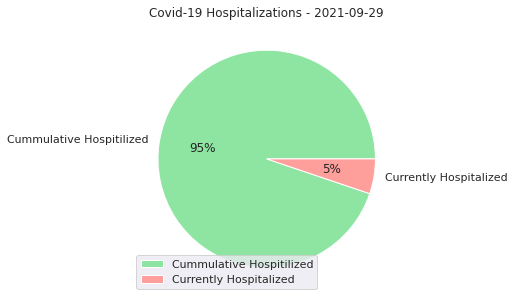

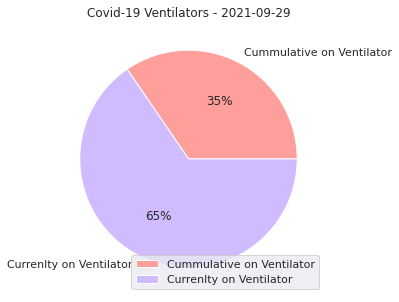

In [ ]:
currentData = [
      data['positive'], data['negative'], data['death'], data['pending'], data['hospitalizedCumulative'], data['hospitalizedCurrently'], data['onVentilatorCumulative'], data['onVentilatorCumulative']
]
labels = [
      "Positive", "Negative", "Death", "Pending", "Cummulative Hospitilized", "Currently Hospitalized", "Cummulative on Ventilator", "Currenlty on Ventilator"
]
# plot simple pie graph
colors = sns.color_palette('pastel')[0:5]
sns.set(
    rc={'figure.figsize':(15,5)}
    )
plt.title("Totals Pos/Neg of COVID19 in US - {}".format(date.today()))
plt.pie(
    [data['positive'], data['negative'], data['death']], 
    labels = ["Positive", "Negative", "Death"], 
    colors = colors, 
    autopct='%.0f%%'
    )
plt.legend(loc="lower right")
plt.show()

# Hospitilizations
colors = sns.color_palette('pastel')[2:4]
sns.set(
    rc={'figure.figsize':(15,5)}
    )
plt.title("Covid-19 Hospitalizations - {}".format(date.today()))

plt.pie(
    [data['hospitalizedCumulative'] - data['hospitalizedCurrently'], 
     data['hospitalizedCurrently']], 
    labels = ["Cummulative Hospitilized", 
              "Currently Hospitalized"],
    colors = colors, 
    autopct='%.0f%%'
    )
plt.legend(loc="lower left")
plt.show()

# Ventilators
colors = sns.color_palette('pastel')[3:5]
sns.set(
    rc={'figure.figsize':(15,5)}
    )
plt.title("Covid-19 Ventilators - {}".format(date.today()))
plt.pie(
    [data['onVentilatorCumulative'] - data['onVentilatorCurrently'], 
     data['onVentilatorCurrently']], 
    labels = ["Cummulative on Ventilator", 
              "Currenlty on Ventilator"], 
    colors = colors, 
    autopct='%.0f%%'
    )
plt.legend(loc="lower right")

---
## **This Section focuses on the growth of COVID-19 disease in the United States.**
---

In [ ]:
# get request for Historical data & put into dataframe
response = requests.get(HISTORIC_US_URL)
response.status_code
data = response.json()['data']
df = pd.DataFrame(data)
df

,date,states,cases,testing,outcomes
0,2021-03-07,56,"{'total': {'value': 28756489, 'calculated': {'...","{'total': {'value': 363825123, 'calculated': {...",{'hospitalized': {'currently': {'value': 40199...
1,2021-03-06,56,"{'total': {'value': 28714654, 'calculated': {'...","{'total': {'value': 362655064, 'calculated': {...",{'hospitalized': {'currently': {'value': 41401...
2,2021-03-05,56,"{'total': {'value': 28654639, 'calculated': {'...","{'total': {'value': 361224072, 'calculated': {...",{'hospitalized': {'currently': {'value': 42541...
3,2021-03-04,56,"{'total': {'value': 28585852, 'calculated': {'...","{'total': {'value': 359479655, 'calculated': {...",{'hospitalized': {'currently': {'value': 44172...
4,2021-03-03,56,"{'total': {'value': 28520365, 'calculated': {'...","{'total': {'value': 357888671, 'calculated': {...",{'hospitalized': {'currently': {'value': 45462...
...,...,...,...,...,...
415,2020-01-17,1,"{'total': {'value': 0, 'calculated': {'populat...","{'total': {'value': 0, 'calculated': {'populat...","{'hospitalized': {'currently': {'value': None,..."
416,2020-01-16,1,"{'total': {'value': 0, 'calculated': {'populat...","{'total': {'value': 0, 'calculated': {'populat...","{'hospitalized': {'currently': {'value': None,..."
417,2020-01-15,1,"{'total': {'value': 0, 'calculated': {'populat...","{'total': {'value': 0, 'calculated': {'populat...","{'hospitalized': {'currently': {'value': None,..."
418,2020-01-14,1,"{'total': {'value': 0, 'calculated': {'populat...","{'total': {'value': 0, 'calculated': {'populat...","{'hospitalized': {'currently': {'value': None,..."


In [ ]:
print(df['cases'][0]['total'])
print(df['testing'][0]['total'])
print(df['outcomes'][0]['hospitalized'])
# format data into lists for matplotlib - historical cases
datesList = df['date'].to_list()
datesList.reverse()
totalCasesList = [df['cases'][i]['total']['value'] for i in range(len(datesList))]
totalCasesList.reverse()
dfTotalCases = pd.DataFrame(
    data={
        "Total Cases": totalCasesList
    },
    index=datesList
)

# calculate percent chances
percentChangesList = []
index = 0
for val in dfTotalCases['Total Cases']:
  previousVal = dfTotalCases['Total Cases'][index - 1]
  if (str(val) == 'nan' or val == 0 or previousVal == 0):
    percentChangesList.append(0)
  else:
    percentChange = (val - previousVal)/val
    percentChangesList.append(percentChange)
  index += 1
dfTotalCases['Percent Change'] = percentChangesList

# calculate simple moving averages
dfTotalCases["7 sma"] = dfTotalCases['Total Cases'].rolling(window=7).mean()
dfTotalCases["20 sma"] = dfTotalCases['Total Cases'].rolling(window=20).mean()
dfTotalCases["50 sma"] = dfTotalCases['Total Cases'].rolling(window=50).mean()
dfTotalCases["100 sma"] = dfTotalCases['Total Cases'].rolling(window=100).mean()

# calculate expontetial moving averages
dfTotalCases["7 ema"] = dfTotalCases['Total Cases'].ewm(
    span=7,min_periods=0,adjust=False,ignore_na=False
    ).mean()
dfTotalCases["20 ema"] = dfTotalCases['Total Cases'].ewm(
    span=20,min_periods=0,adjust=False,ignore_na=False
    ).mean()
dfTotalCases["50 ema"] = dfTotalCases['Total Cases'].ewm(
    span=50,min_periods=0,adjust=False,ignore_na=False
    ).mean()
dfTotalCases["100 ema"] = dfTotalCases['Total Cases'].ewm(
    span=100,min_periods=0,adjust=False,ignore_na=False
    ).mean()

dfTotalCases

{'value': 28756489, 'calculated': {'population_percent': 8.6932, 'change_from_prior_day': 41835, 'seven_day_change_percent': 1.4}}
{'value': 363825123, 'calculated': {'population_percent': 109.9858, 'change_from_prior_day': 1170059, 'seven_day_change_percent': 2.8}}
{'currently': {'value': 40199, 'calculated': {'population_percent': 0.0122, 'change_from_prior_day': -1202, 'seven_day_change_percent': -15.1, 'seven_day_average': 43843}}, 'in_icu': {'currently': {'value': 8134, 'calculated': {'population_percent': 0.0025, 'change_from_prior_day': -275, 'seven_day_change_percent': -17, 'seven_day_average': 8938}}}, 'on_ventilator': {'currently': {'value': 2802, 'calculated': {'population_percent': 0.0008, 'change_from_prior_day': -9, 'seven_day_change_percent': -13.7, 'seven_day_average': 2987}}}}


,Total Cases,Percent Change,7 sma,20 sma,50 sma,100 sma,7 ema,20 ema,50 ema,100 ema
2020-01-13,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14,0.0,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-01-15,0.0,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-01-16,0.0,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-01-17,0.0,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
2021-03-03,28520365.0,0.002343,2.834251e+07,27910988.25,26360388.54,21883653.48,2.833475e+07,2.782544e+07,2.590465e+07,2.227979e+07
2021-03-04,28585852.0,0.002291,2.840466e+07,27976946.35,26474347.28,22043659.80,2.839753e+07,2.789786e+07,2.600980e+07,2.240466e+07
2021-03-05,28654639.0,0.002401,2.846596e+07,28041811.70,26585169.44,22202469.03,2.846180e+07,2.796994e+07,2.611352e+07,2.252842e+07
2021-03-06,28714654.0,0.002090,2.852564e+07,28106069.60,26692262.82,22360580.77,2.852502e+07,2.804086e+07,2.621552e+07,2.265092e+07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


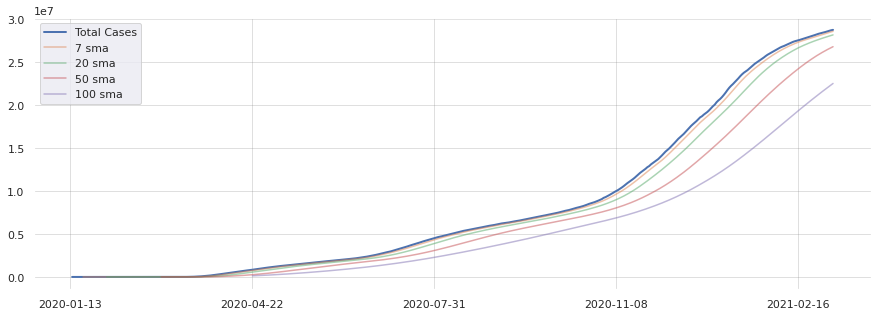

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


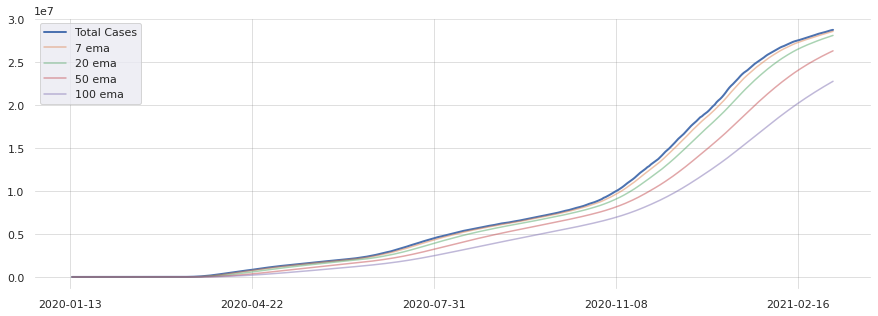

In [ ]:
# plot Total Cases and SMAs data
alpha = 0.5
linewidth = 2
plt.plot(    
    figsize=(12,5),
    title="Total Cases & SMAs",
    ylabel="Total Cases (10 mil)",
    xlabel="Date"
    )
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(
    color='grey', 
    linestyle='-', 
    linewidth=1, 
    alpha=alpha-0.25
  )
dfTotalCases['Total Cases'].plot(legend=True, linewidth=linewidth)
dfTotalCases['7 sma'].plot(legend=True, alpha=alpha)
dfTotalCases['20 sma'].plot(legend=True, alpha=alpha)
dfTotalCases['50 sma'].plot(legend=True, alpha=alpha)
dfTotalCases['100 sma'].plot(legend=True, alpha=alpha)
plt.show()

# plot Total Cases and EMAs data
plt.plot(    
    figsize=(12,5),
    title="Total Cases & EMAs",
    ylabel="Total Cases (10 mil)",
    xlabel="Date"
    )
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(
    color='grey', 
    linestyle='-', 
    linewidth=1, 
    alpha=alpha-0.25
  )
dfTotalCases['Total Cases'].plot(legend=True, linewidth=linewidth)
dfTotalCases['7 ema'].plot(legend=True, alpha=alpha)
dfTotalCases['20 ema'].plot(legend=True, alpha=alpha)
dfTotalCases['50 ema'].plot(legend=True, alpha=alpha)
dfTotalCases['100 ema'].plot(legend=True, alpha=alpha)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


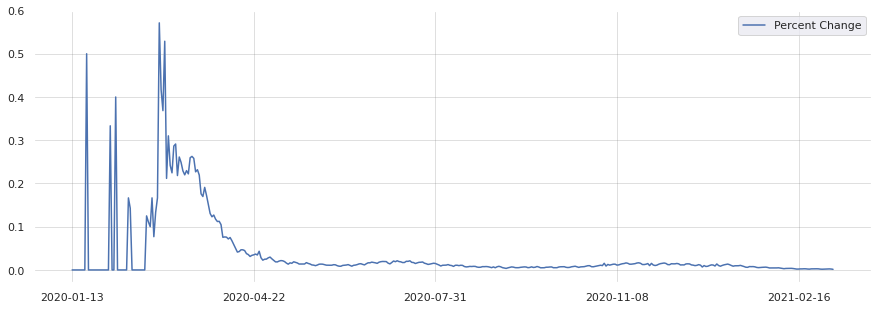

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


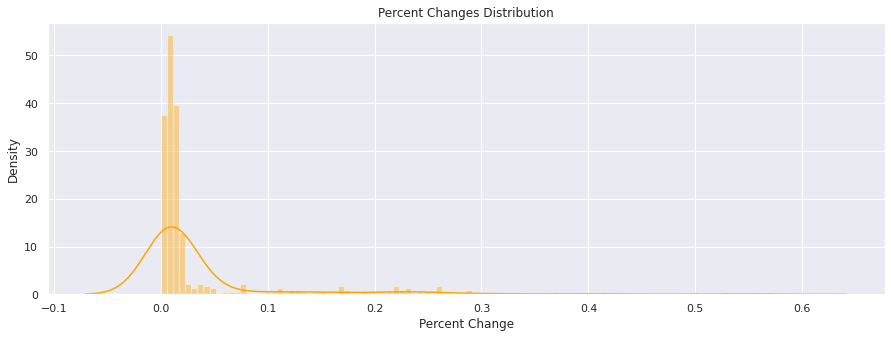

In [ ]:
# plot percent changes
plt.plot(    
    figsize=(12,5),
    title="Total Cases Percent Changes",
    ylabel="Total Cases (10 mil)",
    xlabel="Date"
    )
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(
    color='grey', 
    linestyle='-', 
    linewidth=1, 
    alpha=alpha-0.25
  )
dfTotalCases['Percent Change'].plot(legend=True)
plt.show()

# plot percent changes distribution 
sns.distplot(
    dfTotalCases['Percent Change'], 
    bins=100, color='orange'
    ).set(
        title="Percent Changes Distribution"
        )
sns.set(rc={'figure.figsize':(15,5)})

In [ ]:
# get type of growth in COVID 19 Cases


The first graph represents the actual values 

In [ ]:
# format data for changes per day 
casesChangeList = [df['cases'][i]['total']['calculated']['change_from_prior_day'] for i in range(len(datesList))]
casesChangeList.reverse()
dfCasesChange = pd.DataFrame(
    data={
        "Changes in Cases": casesChangeList
    },
    index=datesList
)

In [ ]:
# percent changes data
percentChangesList = []
index = 0
for val in dfCasesChange['Changes in Cases']:
  previousVal = dfCasesChange['Changes in Cases'][index - 1]
  if (str(val) == 'nan' or val == 0 or previousVal == 0):
    percentChangesList.append(0)
  else:
    percentChange = (val - previousVal)/val
    percentChangesList.append(percentChange)
  index += 1
dfCasesChange['Percent Change'] = percentChangesList

In [ ]:
# format data for rolling standard devition
dfCasesChange['Rolling STD'] = dfCasesChange['Changes in Cases'].rolling(3).std()
dfCasesChange

,Changes in Cases,Percent Change,Rolling STD
2020-01-13,NaN,0.000000,NaN
2020-01-14,NaN,0.000000,NaN
2020-01-15,0.0,0.000000,NaN
2020-01-16,0.0,0.000000,NaN
2020-01-17,0.0,0.000000,0.000000
...,...,...,...
2021-03-03,66836.0,0.188342,9554.158048
2021-03-04,65487.0,-0.020600,6911.254903
2021-03-05,68787.0,0.047974,1659.126377
2021-03-06,60015.0,-0.146163,4430.590028


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


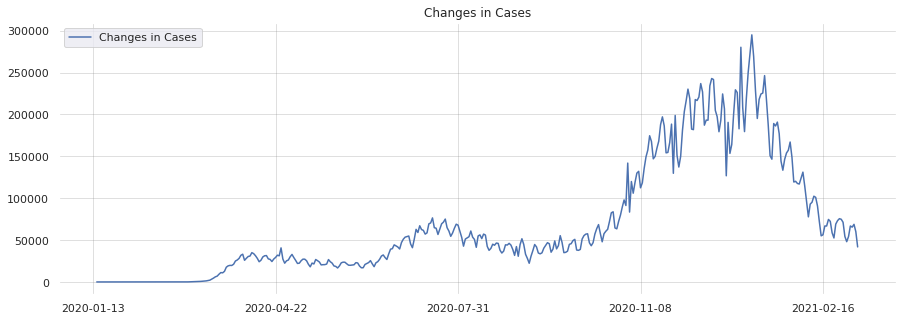

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


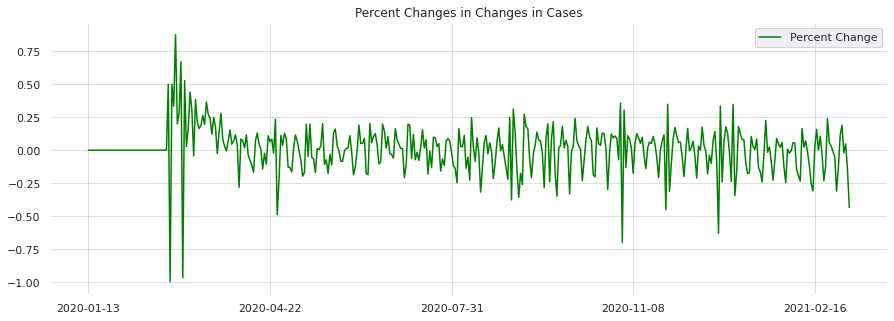

In [ ]:
# plot data
dfCasesChange['Changes in Cases'].plot(
    figsize=(15,5),
    legend=True,
    title="Changes in Cases"
)
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(
    color='grey', 
    linestyle='-', 
    linewidth=1, 
    alpha=alpha-0.25
  )
plt.show()

# percent changes
dfCasesChange['Percent Change'].plot(
    figsize=(15,5),
    legend=True,
    title="Percent Changes in Changes in Cases",
    color="green"
)
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(
    color='grey', 
    linestyle='-', 
    linewidth=1, 
    alpha=alpha-0.25
  )
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


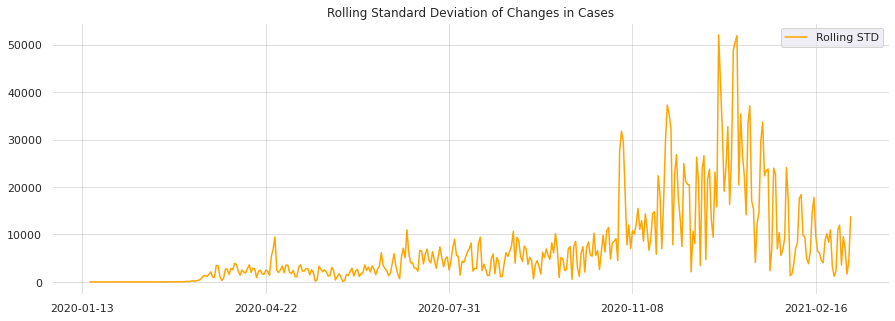

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


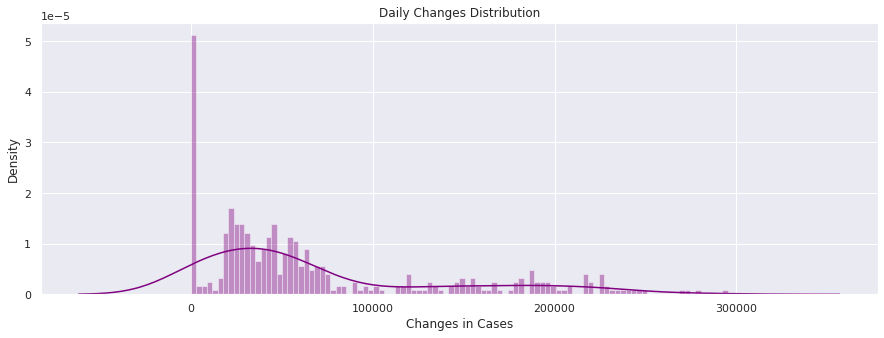

In [ ]:
# rolling std
dfCasesChange['Rolling STD'].plot(
    figsize=(15,5),
    legend=True,
    title="Rolling Standard Deviation of Changes in Cases",
    color="orange"
)
ax = plt.axes()
ax.set_facecolor("white")
plt.grid(
    color='grey', 
    linestyle='-', 
    linewidth=1, 
    alpha=alpha-0.25
  )
plt.show()

# plot distribution graph of daily changes
sns.distplot(
    dfCasesChange['Changes in Cases'], 
    bins=100, color='purple'
    ).set(
        title="Daily Changes Distribution"
        )
sns.set(rc={'figure.figsize':(15,5)})

**This section focuses on statistical analysis of the COVID-19 Disease**

---
## **This section focuses on statistical analysis of the COVID-19 Disease.**
---

---
## **This section focuses on statistical correlation of the COVID 19 disease between states in the United Satates.**
---

In [ ]:
# 
STATE_INPUT = "CA"
# get request for data & put into dataframe
response = requests.get(HISTORIC_STATE_URL(STATE_INPUT))
response.status_code
df = pd.DataFrame(data)
df

,date,states,cases,testing,outcomes
0,2021-03-07,56,"{'total': {'value': 28756489, 'calculated': {'...","{'total': {'value': 363825123, 'calculated': {...",{'hospitalized': {'currently': {'value': 40199...
1,2021-03-06,56,"{'total': {'value': 28714654, 'calculated': {'...","{'total': {'value': 362655064, 'calculated': {...",{'hospitalized': {'currently': {'value': 41401...
2,2021-03-05,56,"{'total': {'value': 28654639, 'calculated': {'...","{'total': {'value': 361224072, 'calculated': {...",{'hospitalized': {'currently': {'value': 42541...
3,2021-03-04,56,"{'total': {'value': 28585852, 'calculated': {'...","{'total': {'value': 359479655, 'calculated': {...",{'hospitalized': {'currently': {'value': 44172...
4,2021-03-03,56,"{'total': {'value': 28520365, 'calculated': {'...","{'total': {'value': 357888671, 'calculated': {...",{'hospitalized': {'currently': {'value': 45462...
...,...,...,...,...,...
415,2020-01-17,1,"{'total': {'value': 0, 'calculated': {'populat...","{'total': {'value': 0, 'calculated': {'populat...","{'hospitalized': {'currently': {'value': None,..."
416,2020-01-16,1,"{'total': {'value': 0, 'calculated': {'populat...","{'total': {'value': 0, 'calculated': {'populat...","{'hospitalized': {'currently': {'value': None,..."
417,2020-01-15,1,"{'total': {'value': 0, 'calculated': {'populat...","{'total': {'value': 0, 'calculated': {'populat...","{'hospitalized': {'currently': {'value': None,..."
418,2020-01-14,1,"{'total': {'value': 0, 'calculated': {'populat...","{'total': {'value': 0, 'calculated': {'populat...","{'hospitalized': {'currently': {'value': None,..."
